In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED)  

In [23]:
cwd = 'D:'

dir_masks = '\\Masks'
dir_images = '\\Images'


In [24]:
# Batch size
bs = 1

# img shape
img_h = 1024
img_w = 1024

num_classes=3

# Example: Image Segmentation
## Build segmentation

In [25]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
    
    train_img_data_gen = ImageDataGenerator(rotation_range=30,
                                            width_shift_range=10,
                                            height_shift_range=10,
                                            zoom_range=0.3,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            fill_mode='reflect',
                                            rescale=1./255)
    
    train_mask_data_gen = ImageDataGenerator(rotation_range=30,
                                             width_shift_range=10,
                                             height_shift_range=10,
                                             zoom_range=0.3,
                                             horizontal_flip=True,
                                             vertical_flip=True,
                                             fill_mode='reflect')
else:
    
    train_img_data_gen = ImageDataGenerator(rescale=1./255)
    
    train_mask_data_gen = ImageDataGenerator()

# Create validation and test ImageDataGenerator objects
valid_img_data_gen = ImageDataGenerator(rescale=1./255)
valid_mask_data_gen = ImageDataGenerator()



In [26]:
paths = ['D:\Development_Dataset\Training\Bipbip\Haricot','D:\Development_Dataset\Training\Bipbip\Mais',
         'D:\Development_Dataset\Training\Pead\Haricot', 'D:\Development_Dataset\Training\Pead\Mais', 
         'D:\Development_Dataset\Training\Roseau\Haricot', 'D:\Development_Dataset\Training\Roseau\Mais',
         'D:\Development_Dataset\Training\Weedelec\Haricot', 'D:\Development_Dataset\Training\Weedelec\Mais'
        ]

files_in_train = []
files_in_annotated = []
 
for path in paths:
    files_in_train.extend(sorted(os.listdir(path+dir_images)))
    files_in_annotated.extend(sorted(os.listdir(path+dir_masks)))

files_in_train = [ i.replace('.jpg','') for i in files_in_train ]
files_in_annotated = [ i.replace('.png','')  for i in files_in_train ] 

images = [i for i in files_in_train if i in files_in_annotated]

df = pd.DataFrame()
df['images'] = [str(x) + '.jpg' for x in images]
df['masks'] = [str(x) + '.png' for x in images]
train_df, valid_df = train_test_split(df, shuffle = True , train_size = 0.8)

train_df

,images,masks
317,Pead_mais_00046_i900.jpg,Pead_mais_00046_i900.png
443,Weedelec_haricot_2019-09-25T114655-74.jpg,Weedelec_haricot_2019-09-25T114655-74.png
183,Bipbip_mais_im_08661.jpg,Bipbip_mais_im_08661.png
187,Bipbip_mais_im_09231.jpg,Bipbip_mais_im_09231.png
189,Bipbip_mais_im_09501.jpg,Bipbip_mais_im_09501.png
...,...,...
106,Bipbip_mais_im_01461.jpg,Bipbip_mais_im_01461.png
381,Pead_mais_00531_i900.jpg,Pead_mais_00531_i900.png
214,Pead_haricot_00069_i750.jpg,Pead_haricot_00069_i750.png
362,Pead_mais_00387_i900.jpg,Pead_mais_00387_i900.png


In [27]:
def read_rgb_mask(img_path):
    '''
    img_path: path to the mask file
    Returns the numpy array containing target values
    '''

    mask_img = Image.open(img_path)
    mask_arr = np.array(mask_img)

    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    

    new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0    #BACKGROUND
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0  #BACKGROUND
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1  #CROP
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2 #WEED

    return new_mask_arr


In [28]:
def open_img_from_path(curr_image):
    if('Bipbip' in curr_image):
        if('haricot' in curr_image):
            img = Image.open(os.path.join(cwd, paths[0], 'Images', curr_image))
        else:
            img = Image.open(os.path.join(cwd, paths[1], 'Images', curr_image))

    elif('Pead' in curr_image):
        if('haricot' in curr_image):
            img = Image.open(os.path.join(cwd, paths[2], 'Images', curr_image))
        else:
            img = Image.open(os.path.join(cwd, paths[3], 'Images', curr_image))
    
    elif('Roseau' in curr_image):
        if('haricot' in curr_image):
            img = Image.open(os.path.join(cwd, paths[4], 'Images', curr_image))
        else:
            img = Image.open(os.path.join(cwd, paths[5], 'Images', curr_image))
            
    else:
        if('haricot' in curr_image):
            img = Image.open(os.path.join(cwd, paths[6], 'Images', curr_image))
        else:
            img = Image.open(os.path.join(cwd, paths[7], 'Images', curr_image))
        
    return img.convert('RGB')

In [29]:
def open_mask_from_path(curr_mask):
    if('Bipbip_haricot' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[0], 'Masks', curr_mask))
    elif('Bipbip_mais' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[1], 'Masks', curr_mask))    
    elif('Pead_haricot' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[2], 'Masks', curr_mask))
    elif('Pead_mais' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[3], 'Masks', curr_mask))
    elif('Roseau_haricot' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[4], 'Masks', curr_mask))
    elif('Roseau_mais' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[5], 'Masks', curr_mask))
    elif('Weedelec_haricot' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[6], 'Masks', curr_mask))
    elif('Weedelec_mais' in curr_mask):
        mask = read_rgb_mask(os.path.join(cwd, paths[7], 'Masks', curr_mask))        
    
    return mask

In [30]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

    """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

    """

    def __init__(self, df, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[img_w, img_h]):

        self.which_subset = which_subset
        self.dataset_df = df
        self.img_generator = img_generator
        self.mask_generator = mask_generator
        self.preprocessing_function = preprocessing_function
        self.out_shape = out_shape

    def __len__(self):
        return len(self.dataset_df)

    def __getitem__(self, index):
        # Read Image
        curr_image = self.dataset_df['images'].iloc[index]
        curr_mask = self.dataset_df['masks'].iloc[index]
        
        img = open_img_from_path(curr_image)
          
        mask_arr = open_mask_from_path(curr_mask)
        mask = Image.fromarray(mask_arr, mode = 'P')
        
        # Resize image and mask
        img = img.resize(self.out_shape)
        mask = mask.resize(self.out_shape, resample = Image.NEAREST)

        img_arr = np.array(img)
        mask_arr = np.array(mask)
        mask_arr = np.expand_dims(mask_arr, -1)

        if self.which_subset == 'training':
            if self.img_generator is not None and self.mask_generator is not None:
                # Perform data augmentation
                # We can get a random transformation from the ImageDataGenerator using get_random_transform
                # and we can apply it to the image using apply_transform
                img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
                mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
                img_arr = self.img_generator.apply_transform(img_arr, img_t)
                # ImageDataGenerator use bilinear interpolation for augmenting the images.
                # Thus, when applied to the masks it will output 'interpolated classes', which
                # is an unwanted behaviour. As a trick, we can transform each class mask 
                # separately and then we can cast to integer values (as in the binary segmentation notebook).
                # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
                out_mask = np.zeros_like(mask_arr)
                for c in np.unique(mask_arr):
                    if c > 0:
                        curr_class_arr = np.float32(mask_arr == c)
                        curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
                        # from [0, 1] to {0, 1}
                        curr_class_arr = np.uint8(curr_class_arr)
                        # recover original class
                        curr_class_arr = curr_class_arr * c 
                        out_mask += curr_class_arr
        else:
            out_mask = mask_arr

        if self.preprocessing_function is not None:
            img_arr = self.preprocessing_function(img_arr)

        return img_arr, np.float32(out_mask)

In [31]:
from tensorflow.keras.applications.resnet import preprocess_input

dataset = CustomDataset(train_df,'training', 
                        img_generator= train_img_data_gen, 
                        mask_generator= train_mask_data_gen,
                        preprocessing_function=preprocess_input)

dataset_valid = CustomDataset(valid_df,'validation', 
                              preprocessing_function=preprocess_input)


In [32]:
# For all pixel I set a label [img_h, img_w, 1]

train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                              )

train_dataset = train_dataset.batch(bs)

train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                              )
valid_dataset = valid_dataset.batch(bs)

valid_dataset = valid_dataset.repeat()


In [33]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
#evenly_spaced_interval = np.linspace(0, 1, 20)
#colors = [cm.rainbow(x) for x in evenly_spaced_interval]
colors = {}
iterator = iter(valid_dataset)
colors[0] = [0, 0, 0, 0]
colors[1] = [1, 1, 1] #FOR THE CROP
colors[2] = [0.75, 0.0, 0.0]


[0. 1. 2.]


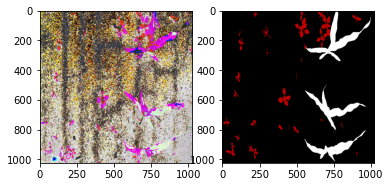

In [34]:
# 0, x where x is the num_classes
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(0, num_classes):
    target_img[np.where(target == i)] = np.array(colors[i])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

In [35]:
#try ResNet152
resnet = tf.keras.applications.ResNet152(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))
resnet.summary()
for layer in resnet.layers:
    layer.trainable = False

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 1030, 1030, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 512, 512, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 512, 512, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

## Convolutional Neural Network (CNN)
### Encoder-Decoder

In [36]:
def create_model(depth, start_f, num_classes):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    model.add(resnet)
    
    start_f = 256
        
    # Decoder
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear'))
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2
    
    #add batch Norm

    # Prediction Layer
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes,
                                     kernel_size=(1, 1),
                                     strides=(1, 1),
                                     padding='same',
                                     activation='softmax'))
    
    return model

In [37]:
model = create_model(depth=5, 
                     start_f=256,  #changed from 8 
                     num_classes=num_classes)

# Visualize created model as a table
model.summary()

# Visualize initialized weights
# model.weights

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 32, 32, 2048)      58370944  
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 64, 64, 2048)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 256)       4718848   
_________________________________________________________________
re_lu_5 (ReLU)               (None, 64, 64, 256)       0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 128)     295040    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 128, 128, 128)    

## Prepare the model for training

In [38]:
# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy() 

# learning rate
lr = 5e-5

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1, num_classes): # exclude the background class 0
        # Get prediction and target related to only a single class (i)
        class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
        class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
        intersection = tf.reduce_sum(class_true * class_pred)
        union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection

        iou = (intersection + 1e-7) / (union + 1e-7)
        per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU]
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training with callbacks

In [39]:
cwd = os.getcwd()
callbacks = []

#Early stopping was applied and also a LR adapter callback,
# which helps us to get into the right minimum. 
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_meanIoU', patience=8)
    callbacks.append(es_callback)
    
#LRPlateau
lr_plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_meanIoU",
    factor=0.2,
    patience=2,
    min_lr=0,
)    

callbacks.append(lr_plateau_callback)



# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# tensorboard --logdir D:\segmentation_experiments_ --reload_multifile True --port 8080
# 2. localhost:PORT   <- in your browser

In [40]:
model.fit(x = train_dataset,
          epochs = 100,  
          steps_per_epoch = len(dataset),
          validation_data = valid_dataset,
          validation_steps = len(dataset_valid),
          callbacks = callbacks
         )


Epoch 1/100
504/504 [==============================] - 1286s 3s/step - loss: 0.1307 - accuracy: 0.9510 - meanIoU: 0.2934 - val_loss: 0.1055 - val_accuracy: 0.9580 - val_meanIoU: 0.4120
Epoch 2/100
504/504 [==============================] - 1373s 3s/step - loss: 0.0989 - accuracy: 0.9602 - meanIoU: 0.3634 - val_loss: 0.0998 - val_accuracy: 0.9602 - val_meanIoU: 0.4305
Epoch 3/100
504/504 [==============================] - 1370s 3s/step - loss: 0.0913 - accuracy: 0.9629 - meanIoU: 0.3913 - val_loss: 0.0981 - val_accuracy: 0.9608 - val_meanIoU: 0.4499
Epoch 4/100
504/504 [==============================] - 1370s 3s/step - loss: 0.0838 - accuracy: 0.9654 - meanIoU: 0.4226 - val_loss: 0.1021 - val_accuracy: 0.9591 - val_meanIoU: 0.3963
Epoch 5/100
504/504 [==============================] - 1385s 3s/step - loss: 0.0817 - accuracy: 0.9662 - meanIoU: 0.4317 - val_loss: 0.1007 - val_accuracy: 0.9596 - val_meanIoU: 0.4048
Epoch 6/100
504/504 [==============================] - 1394s 3s/step - loss

## Test the model

In [44]:
# Testing images directories

test_paths = ['D:\Development_Dataset\Test_Final\Bipbip\Haricot\Images', 'D:\Development_Dataset\Test_Final\Bipbip\Mais\Images',
              'D:\Development_Dataset\Test_Final\Pead\Haricot\Images', 'D:\Development_Dataset\Test_Final\Pead\Mais\Images',
              'D:\Development_Dataset\Test_Final\Roseau\Haricot\Images', 'D:\Development_Dataset\Test_Final\Roseau\Mais\Images',
              'D:\Development_Dataset\Test_Final\Weedelec\Haricot\Images', 'D:\Development_Dataset\Test_Final\Weedelec\Mais\Images']


In [45]:
# Append the images in a directory to a list of images return the list of the image names

def add_images_to_list(directory, images):
    img_names = sorted(os.listdir(directory))
    for image in img_names:
        img_path = directory + '\\'+ image
        img = Image.open(img_path).convert('RGB')
        img = img.resize([img_h, img_w])  #choose same size as training size
        img = np.array(img)
        images.append(img)
    
    # Remove file extensions
    img_names = [i.replace('.jpg','') for i in img_names]
    img_names = [i.replace('.png','') for i in img_names]
    return img_names


In [48]:
test_images = []
img_names = []

for path in test_paths:
    img_names.extend(add_images_to_list(path, test_images))
          

In [49]:
iterator = iter(valid_dataset)

d:\anaconda\envs\tf_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


(1, 1024, 1024, 3)

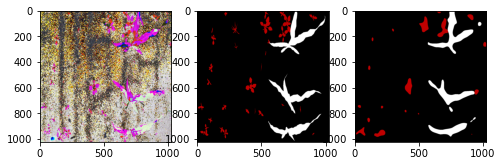

In [50]:
# Check how the model perform on the validation dataset

fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, num_classes):
    target_img[np.where(target == i)] = np.array(colors[i])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, num_classes):
    prediction_img[np.where(predicted_class == i)] = np.array(colors[i])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

In [51]:
# Check how the model perform on the test dataset (just show some predictions)

submission_images = {}
show_images = {}
counter = 0;

for i in range(0, 3):
    out_sigmoid = model.predict(x=tf.expand_dims(test_images[i], 0))
    predicted_class = tf.argmax(out_sigmoid, -1)
    predicted_class = np.array(predicted_class)
    
    predicted_class = predicted_class[0, ...]
    prediction_img = np.zeros([target.shape[0], target.shape[1], 3])
    
    for j in range(0, 3):
        prediction_img[np.where(predicted_class == j)] = np.array(colors[j])[:3] * 255   
    
    submission_images[img_names[i]] = predicted_class
    show_images[counter] = prediction_img
    counter = counter +1


KeyError: 'Bipbip_haricot_im_00211'

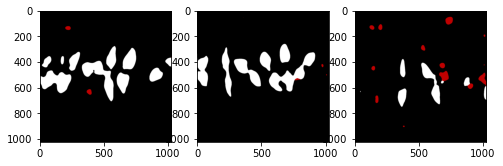

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
ax[0].imshow(np.uint8(show_images[0]))
ax[1].imshow(np.uint8(show_images[1]))
ax[2].imshow(np.uint8(show_images[2]))
submission_images['Bipbip_haricot_im_00211']

## Prepare Submission

In [53]:
def rle_encode(img):
    '''
    img: numpy array, 1 - foreground, 0 - background
    Returns run length as string formatted
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [54]:
def predict_image(image, shape):
    out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

    resized = tf.image.resize(out_sigmoid, shape, method='nearest') 

    predicted_class = tf.argmax(resized.numpy(), -1)
    predicted_class = predicted_class[0, ...]

    return predicted_class


In [55]:
def get_size(img_name):
    if('Bipbip' in img_name):
        size = (1536, 2048)
    elif('Pead' in img_name):
        size = (2464, 3280)
    elif('Roseau' in img_name):
        size = (819, 1228)
    else:
        size = (3456, 5184)
    return size

In [56]:

submission_dict = {}

def add_to_submission(test_image_arr, img_name):
    
    size = get_size(img_name)
    mask_arr = predict_image(test_image_arr, size).numpy()
    
    submission_dict[img_name] = {}
    submission_dict[img_name]['shape'] = mask_arr.shape
    
    if('Bipbip' in img_name):
        submission_dict[img_name]['team'] = 'Bipbip'
    elif('Pead' in img_name):
        submission_dict[img_name]['team'] = 'Pead'
    elif('Roseau' in img_name):
        submission_dict[img_name]['team'] = 'Roseau'
    elif('Weedelec' in img_name):
        submission_dict[img_name]['team'] = 'Weedelec'
    
    if('haricot' in img_name):
        submission_dict[img_name]['crop'] = 'Haricot'
    if('mais' in img_name):
        submission_dict[img_name]['crop'] = 'Mais'
    
    submission_dict[img_name]['segmentation'] = {}

    rle_encoded_crop = rle_encode(mask_arr == 1)
    rle_encoded_weed = rle_encode(mask_arr == 2)

    submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
    submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

for test_image, img_name in zip(test_images, img_names):
    add_to_submission(test_image, img_name)

In [57]:
import json

# Finally, save the results into the submission.json file
with open("D://Development_Dataset//submission.json", 'w') as f:
        json.dump(submission_dict, f)